<CENTER>
    <img src="https://www.opportunitiesforafricans.com/wp-content/uploads/2016/11/ictp-696x222.png" alt="Satellite image of three hurricanes" width="40%">
</CENTER>

# Example of using 2D histogram for simple analysis of satellite images
arturos@cern.ch

##### Source of the data

###### Satellite pictures used in the example
* https://www.ncdc.noaa.gov/gibbs/availability/2018-01-01
   * https://www.ncdc.noaa.gov/gibbs/html/GOE-13/WV/2018-01-01-00
   * https://www.ncdc.noaa.gov/gibbs/html/GOE-13/WV/2018-01-01-03


Getting input two IR images

In [1]:
TASImage image_1("prueba0.jfif");
UInt_t yPixels_1 = image_1.GetHeight();
UInt_t xPixels_1 = image_1.GetWidth();
UInt_t *argb_1   = image_1.GetArgbArray();

TASImage image_2("prueba1.jfif");
UInt_t yPixels_2 = image_2.GetHeight();
UInt_t xPixels_2 = image_2.GetWidth();
UInt_t *argb_2   = image_2.GetArgbArray();

Defining histograms

In [2]:
TH2D* h_image_1 = new TH2D("h_image_1","Satellite image of before",xPixels_1,-1,1,yPixels_1,-1,1);
TH2D* h_image_2 = new TH2D("h_image_2","Satellite image of after",xPixels_2,-1,1,yPixels_2,-1,1);

Creating a 2D map with each of the input images

In [3]:
float entriesInPixel= 0;

for (int row=0; row<xPixels_1; ++row)
{
    for (int col=0; col<yPixels_1; ++col)
    {
        int index_1 = col*xPixels_1+row;
        int index_2 = col*xPixels_2+row;
        
        float indexvalue1 = float(argb_1[index_1]);
        float indexvalue2 = float(argb_2[index_2]);
        //float greyScale = float(argb_1[index_1]&0xff)/256;
        //float greyScale = float(argb_2[index_2]&0xff)/256;
        
        if(indexvalue1 > entriesInPixel)
        {
            h_image_1->SetBinContent(row+1,yPixels_1-col,indexvalue1);
            h_image_2->SetBinContent(row+1,yPixels_2-col,indexvalue2);
        }
    }
}

Draw those 2D histograms/maps

In [4]:
//%jsroot on

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


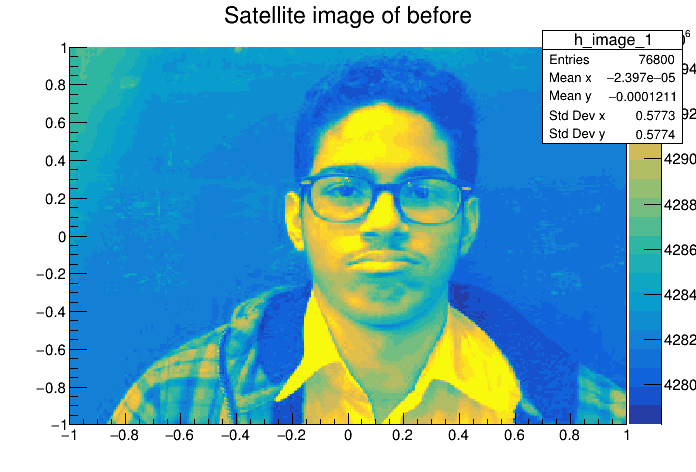

In [5]:
h_image_1->Draw("colz");
c1->Draw();

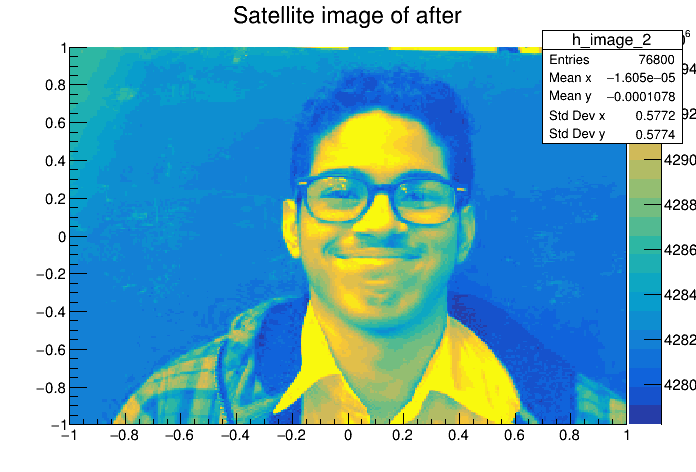

In [6]:
h_image_2->Draw("colz");
c1->Draw();

Let's make the ratio between boths

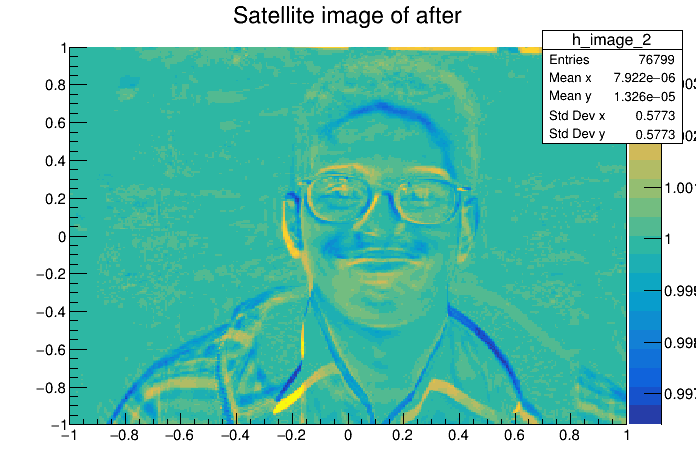

In [7]:
h_image_2->Divide(h_image_1);

h_image_2->Draw("colz");

c1->Draw();

Applying another style

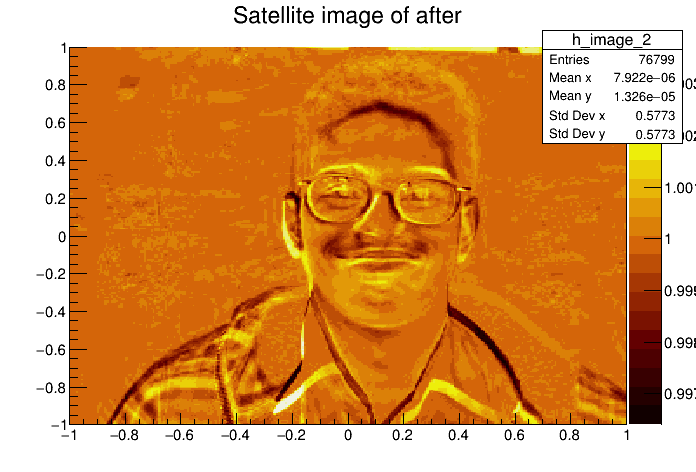

In [8]:
gStyle->SetPalette(53);
h_image_2->Draw("colz");

c1->Draw();

**Done!**


In [9]:
TASImage image_3("WIN_20200114_15_08_57_Pro.jpg");
UInt_t yPixels_3 = image_3.GetHeight();
UInt_t xPixels_3 = image_3.GetWidth();
UInt_t *argb_3   = image_3.GetArgbArray();

TASImage image_4("WIN_20200114_15_09_30_Pro.jpg");
UInt_t yPixels_4 = image_4.GetHeight();
UInt_t xPixels_4 = image_4.GetWidth();
UInt_t *argb_4   = image_4.GetArgbArray();

In [ ]:
TH2D* h_image_3 = new TH2D("h_image_3","Satellite image of before",xPixels_3,-1,1,yPixels_3,-1,1);
TH2D* h_image_4 = new TH2D("h_image_4","Satellite image of after",xPixels_4,-1,1,yPixels_4,-1,1);

In [ ]:
float entriesInPixel3= 1;

for (int row=0; row<xPixels_3; ++row)
{
    for (int col=0; col<yPixels_3; ++col)
    {
        int index_3 = col*xPixels_3+row;
        int index_4 = col*xPixels_4+row;
        
        float indexvalue3 = float(argb_1[index_1]);
        float indexvalue4 = float(argb_2[index_2]);
        //float greyScale = float(argb_1[index_1]&0xff)/256;
        //float greyScale = float(argb_2[index_2]&0xff)/256;
        
        if(indexvalue3 > entriesInPixel)
        {
            h_image_3->SetBinContent(row+1,yPixels_3-col,indexvalue3);
            h_image_4->SetBinContent(row+1,yPixels_4-col,indexvalue4);
        }
    }
}

In [ ]:
h_image_3->Draw("colz");
c1->Draw();

In [ ]:
h_image_4->Draw("colz");
c1->Draw();

In [ ]:
h_image_4->Divide(h_image_3);

h_image_4->Draw("colz");

c1->Draw();

In [ ]:
gStyle->SetPalette(53);
h_image_4->Draw("colz");

c1->Draw();